# Part 01

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('insurance_data.csv')
df.head(20)

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


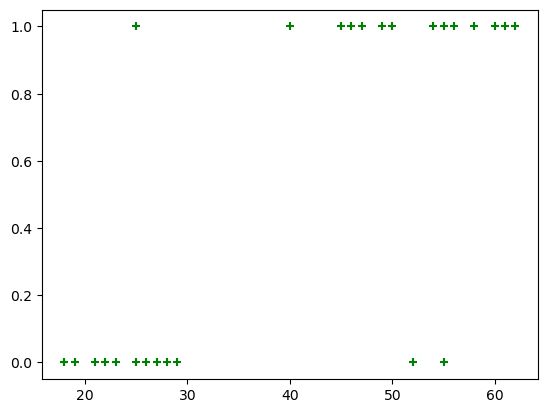

In [3]:
plt.scatter(df.age, df.bought_insurance, marker='+', color='green')

In [4]:
df.shape

(27, 2)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, test_size=0.5)

In [7]:
X_test

,age
3,52
2,47
22,40
16,25
20,21
6,55
15,55
8,62
17,58
12,27


In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
model = LogisticRegression()

In [10]:
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
model.predict(X_test)

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0], dtype=int64)

In [12]:
model.score(X_test, y_test)

0.7857142857142857

In [13]:
model.predict_proba(X_test)

array([[1.00535968e-03, 9.98994640e-01],
       [1.07845768e-02, 9.89215423e-01],
       [2.34487628e-01, 7.65512372e-01],
       [9.97438722e-01, 2.56127812e-03],
       [9.99618406e-01, 3.81594075e-04],
       [2.40880325e-04, 9.99759120e-01],
       [2.40880325e-04, 9.99759120e-01],
       [8.57524901e-06, 9.99991425e-01],
       [5.76804381e-05, 9.99942320e-01],
       [9.93384095e-01, 6.61590539e-03],
       [2.74981966e-02, 9.72501803e-01],
       [1.38100500e-05, 9.99986190e-01],
       [9.89388187e-01, 1.06118130e-02],
       [9.99010902e-01, 9.89097660e-04]])

In [14]:
y_test

3     0
2     1
22    1
16    1
20    0
6     0
15    1
8     1
17    1
12    0
23    1
9     1
11    0
26    0
Name: bought_insurance, dtype: int64

In [15]:
model.coef_

array([[0.47652179]])

In [16]:
model.predict([[55]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

# Part 02 (Image Classification)

In [17]:
from sklearn.datasets import load_digits

In [19]:
digits = load_digits()

In [20]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [30]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

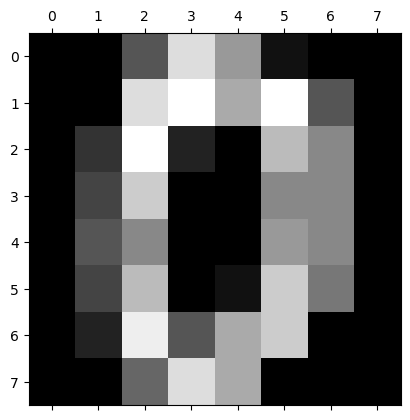

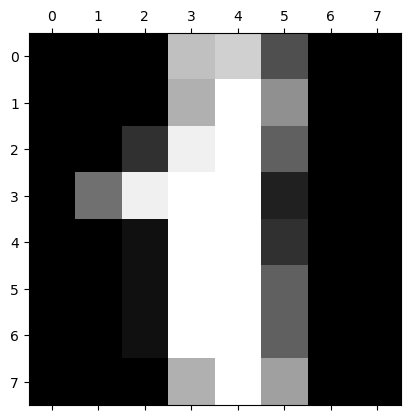

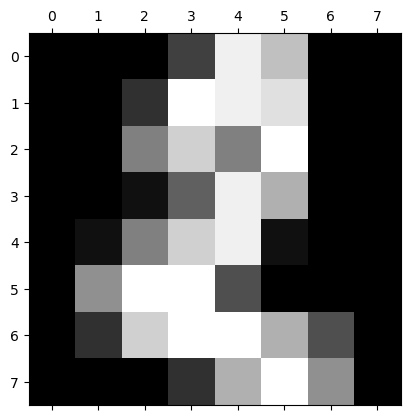

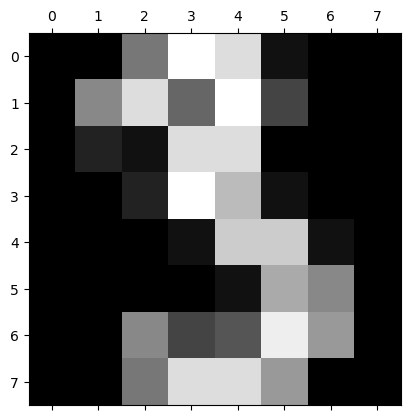

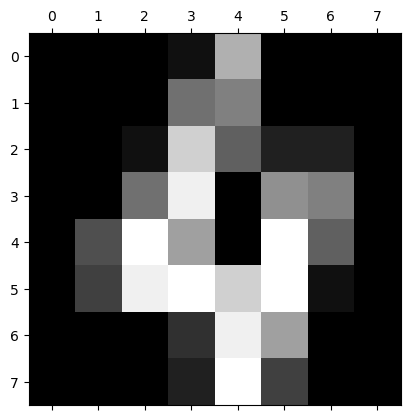

In [34]:
plt.gray()

for i in range(5):
    plt.matshow(digits.images[i])

In [35]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [36]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.4)

In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [40]:
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
model.score(X_test, y_test)

0.9638386648122392

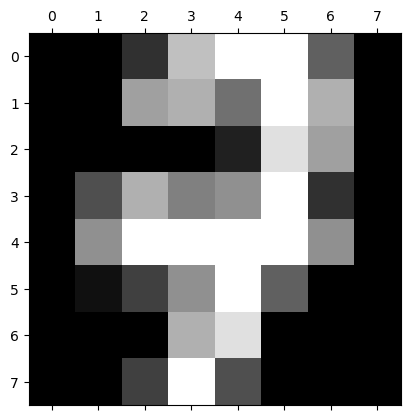

In [56]:
plt.matshow(digits.images[52])

In [57]:
digits.target[52]

7

In [59]:
model.predict([digits.data[52]])

array([7])

In [61]:
model.predict(digits.data[0:10])

array([0, 1, 2, 3, 4, 9, 6, 7, 8, 9])

In [64]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
cm

array([[70,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 76,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  2, 71,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 57,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 70,  0,  1,  0,  1,  0],
       [ 0,  0,  0,  1,  0, 70,  0,  1,  1,  3],
       [ 0,  0,  0,  0,  0,  0, 70,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 73,  1,  4],
       [ 0,  2,  0,  0,  0,  3,  0,  0, 70,  1],
       [ 1,  1,  0,  0,  0,  0,  0,  0,  0, 66]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

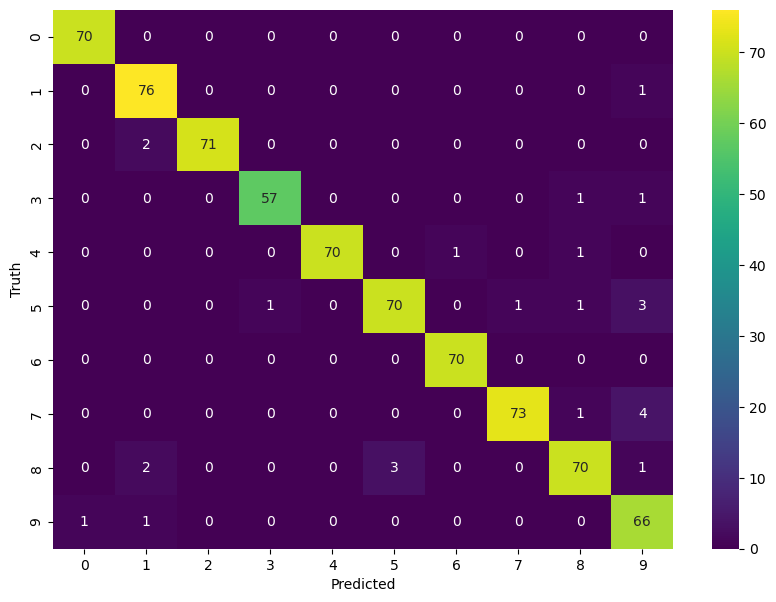

In [74]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, cmap="viridis")
plt.xlabel('Predicted')
plt.ylabel('Truth')